In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import os
os.getcwd()

'C:\\Users\\reliance\\Desktop\\MARKETING PROJECT'

In [2]:
data= pd.read_csv("data.csv")
data.iloc[30,2]
data.head()

,description,text,date,keywords,summary,url
0,5G hype won't close the digital divide,Dhara Singh/CNET\n\nTwelve miles from the hust...,2019-08-14 05:00:00-07:00,"['speeds', 'close', 'digital', 'hype', 'servic...","""Especially in Chicago [internet access] must ...",https://www.cnet.com//news/5g-hype-isnt-going-...
1,Doctor Who will stream on HBO Max,BBC\n\nDoctor Who will be streaming exclusivel...,2019-08-01 12:25:00-07:00,"['series', 'max', 'stream', 'cw', 'coming', 'd...",BBCDoctor Who will be streaming exclusively on...,https://www.cnet.com//news/doctor-who-will-str...
2,Leaked dongle hints at end of the headphone ja...,Roland Quandt\n\nThe headphone jack on phones ...,2019-08-01 07:41:00-07:00,"['samsungs', 'jack', 'dongle', 'samsung', 'rol...",Roland QuandtThe headphone jack on phones had ...,https://www.cnet.com//news/leaked-dongle-hints...
3,Apple ASMR videos are a pleasure for your eyes...,Geoffrey Morrison/CNET\n\nIf autonomous sensor...,2019-08-07 13:27:00-07:00,"['apple', 'iphone', 'video', 'wood', 'videos',...",Geoffrey Morrison/CNETIf autonomous sensory me...,https://www.cnet.com//news/apple-asmr-videos-a...
4,Adobe Fresco shows oil and water(colors) do mix,Sarah Tew/CNET\n\nAdobe Fresco makes me wish I...,2019-08-12 06:00:04-07:00,"['wish', 'really', 'mobile', 'adobe', 'fresco'...",Adobe credits Apple's latest graphics processo...,https://www.cnet.com//news/adobe-fresco-shows-...


In [3]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
0,Dhara Singh/CNET\n\nTwelve miles from the hust...,2297
1,BBC\n\nDoctor Who will be streaming exclusivel...,170
2,Roland Quandt\n\nThe headphone jack on phones ...,192
3,Geoffrey Morrison/CNET\n\nIf autonomous sensor...,206
4,Sarah Tew/CNET\n\nAdobe Fresco makes me wish I...,595


In [4]:
##Descriptive statistics of word counts
data.word_count.describe()

count    1535.000000
mean      534.565472
std       498.855413
min         3.000000
25%       254.000000
50%       350.000000
75%       606.000000
max      3841.000000
Name: word_count, dtype: float64

In [5]:
#Identify common words
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:5]
freq

the    40376
to     21728
a      20250
and    19683
of     17099
dtype: int64

In [6]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data
         ['text']).split()).value_counts()[-10:]
freq1

rules:       1
24%          1
faceless,    1
"always      1
"phantom"    1
$1,299,      1
hands).      1
runway.      1
1959.        1
document.    1
dtype: int64

In [7]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [8]:
corpus = []
for i in range(0, len(data['text'])):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [9]:
corpus[0]

'dhara singh cnet twelve mile hustle bustle time square lie brooklyn neighborhood brownsville part york tourist ever see gone flashing light high tech billboard crossroad world instead story sleek building stand stark contrast bare industrial street surrounding district building york councilwoman alicka amprey samuel say experiencing issue altice optimum internet service past four year rain say service stop complaint internet service provider changed status quo city country conversation next best thing conversation always get something even half way decent said people even grocery store people amprey samuel suffering connection woe across greater brownsville ocean hill community represents brownsville alone resident say rely public wi fi free cheaper use connectivity option according recent report brooklyn public library even broadband like ampry samuel service often spotty hype g next generation mobile technology promise high speed time faster current g tech mask reality million ameri

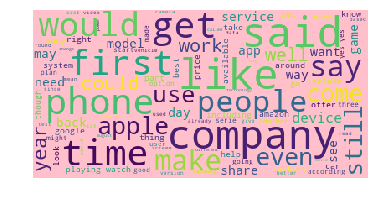

In [10]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(background_color='pink',stopwords=stop_words,max_words=100,max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [12]:
list(cv.vocabulary_.keys())[:10]

['singh',
 'cnet',
 'mile',
 'time',
 'square',
 'lie',
 'brooklyn',
 'neighborhood',
 'part',
 'york']

In [13]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [14]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'said'),
 Text(0, 0, 'like'),
 Text(0, 0, 'year'),
 Text(0, 0, 'company'),
 Text(0, 0, 'cnet'),
 Text(0, 0, 'time'),
 Text(0, 0, 'get'),
 Text(0, 0, 'apple'),
 Text(0, 0, 'phone'),
 Text(0, 0, 'first'),
 Text(0, 0, 'make'),
 Text(0, 0, 'watch'),
 Text(0, 0, 'google'),
 Text(0, 0, 'people'),
 Text(0, 0, 'may'),
 Text(0, 0, 'share'),
 Text(0, 0, 'service'),
 Text(0, 0, 'would'),
 Text(0, 0, 'say'),
 Text(0, 0, 'note')]

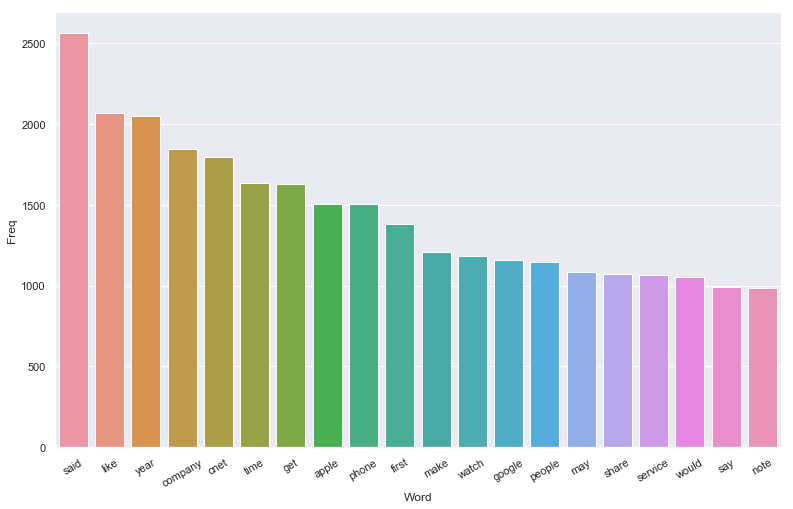

In [15]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[2]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [50]:
tf_idf_vector.shape

(1, 10000)

In [51]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


In [52]:
sorted_items=sort_coo(tf_idf_vector.tocoo())
#sort the tf-idf vectors by descending order of scoressorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
roland quandt headphone jack phone good run like good thing eventually must end end seems finally arrived samsung upcoming galaxy note line last holdout trend ditching headphone jack appears samsung going note line leaked image shared thursday roland quandt sammobile seems pretty clear samsung planning mm headphone jack usb c dongle note plus dongle look like well headphone adapter different apple make iphones google make pixel signal end era showing samsung may indeed planning move without port going forward unclear samsung include dongle box like google charge separately like apple answer well samsung heavily rumored leaked next flagship likely need wait samsung unpacked event aug samsung immediately respond request comment

Keywords:
samsung 0.451
dongle 0.296
headphone 0.276
headphone jack 0.233
note line 0.204
jack 0.201
leaked 0.156
planning 0.141
note 0.133
end 0.122
seems 0.114
like 0.111
holdout 0.107
samsung may 0.102
mm headphone jack 0.1
mm headphone 0.1
going fo

In [53]:
data.iloc[2,4]

"Roland QuandtThe headphone jack on phones had a good run, but like all good things, it eventually must end.\nThat end seems to have finally arrived with Samsung's upcoming Galaxy Note 10 line.\nAfter being one of the last holdouts against the trend of ditching the headphone jack, it appears that Samsung is going to do just that for the Note 10 line.\nIn leaked images shared Thursday by Roland Quandt and SamMobile, it seems pretty clear Samsung is planning a 3.5mm headphone jack to USB-C dongle for its new Note 10 and 10 Plus.\nThe dongle itself looks like, well, a headphone adapter no different than what Apple makes for its iPhones or Google makes for its Pixels."

In [54]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [55]:
xtrain_count =  count_vect.transform(corpus)
print(xtrain_count)

  (0, 43)	2
  (0, 47)	1
  (0, 74)	3
  (0, 128)	15
  (0, 161)	4
  (0, 174)	1
  (0, 230)	3
  (0, 231)	2
  (0, 291)	3
  (0, 293)	1
  (0, 302)	2
  (0, 330)	1
  (0, 332)	1
  (0, 357)	1
  (0, 375)	1
  (0, 382)	2
  (0, 394)	1
  (0, 443)	1
  (0, 462)	2
  (0, 463)	1
  (0, 464)	3
  (0, 506)	1
  (0, 556)	2
  (0, 693)	1
  (0, 695)	3
  :	:
  (1534, 17482)	1
  (1534, 17490)	1
  (1534, 17729)	1
  (1534, 17730)	1
  (1534, 18263)	1
  (1534, 18268)	1
  (1534, 18864)	1
  (1534, 20565)	1
  (1534, 20681)	1
  (1534, 20734)	1
  (1534, 20872)	1
  (1534, 20910)	1
  (1534, 20965)	1
  (1534, 22324)	1
  (1534, 24089)	1
  (1534, 24785)	1
  (1534, 25426)	1
  (1534, 26268)	1
  (1534, 26609)	1
  (1534, 26948)	1
  (1534, 27167)	1
  (1534, 27689)	1
  (1534, 27957)	1
  (1534, 28060)	1
  (1534, 28271)	2


In [56]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, string


In [60]:
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()
topic_word.shape

(20, 28517)

In [61]:
n_top_words = 20
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [62]:
topic_summaries

['car vehicle model moon enlarge space engine image nasa electric mission wheel speed automaker system player v corvette standard first',
 'thrawn tesla straubel ecurie zahn grid outing treason jaguar ecosse krennic grysk ronan megawatt megapack disha tactician peaker shadowy xj',
 'r newmark lakh craigslist neopets ed slab virtual site journalism oculus madeline film bitmoji godzilla hauer craig disinformation pet resume',
 'game nintendo pokemon switch chan shooting mass console recall site owner el paso shield sword walmart hate death posted attack',
 'marvel movie comic film avenger con character endgame thor series scene fan plus spider panel universe tertill thunder phase director',
 'food coffee recipe meal pot instant dog burger make cheese meat cup cold best brew ingredient plant delivery product impossible',
 'lens contact eye shark gmc vb transition midge sunglass acuvue dhoni insurance kartik tamil escalade sierra vision bright nadu pocket',
 'state said india broadband mob

# Fuzzy seq similarity using Levenstein

In [65]:
from fuzzywuzzy import fuzz
fuzz.ratio(topic_summaries[3],corpus[979])

0

In [67]:
fuzz.ratio("computer lab", "computer lab")

100

In [71]:
label_topics=np.zeros((len(corpus),20))
for i in range(len(corpus)):
    for j in range(20):
        print(i,j)
        label_topics[i,j]=fuzz.ratio(corpus[i],topic_summaries[j])

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10

76 16
76 17
76 18
76 19
77 0
77 1
77 2
77 3
77 4
77 5
77 6
77 7
77 8
77 9
77 10
77 11
77 12
77 13
77 14
77 15
77 16
77 17
77 18
77 19
78 0
78 1
78 2
78 3
78 4
78 5
78 6
78 7
78 8
78 9
78 10
78 11
78 12
78 13
78 14
78 15
78 16
78 17
78 18
78 19
79 0
79 1
79 2
79 3
79 4
79 5
79 6
79 7
79 8
79 9
79 10
79 11
79 12
79 13
79 14
79 15
79 16
79 17
79 18
79 19
80 0
80 1
80 2
80 3
80 4
80 5
80 6
80 7
80 8
80 9
80 10
80 11
80 12
80 13
80 14
80 15
80 16
80 17
80 18
80 19
81 0
81 1
81 2
81 3
81 4
81 5
81 6
81 7
81 8
81 9
81 10
81 11
81 12
81 13
81 14
81 15
81 16
81 17
81 18
81 19
82 0
82 1
82 2
82 3
82 4
82 5
82 6
82 7
82 8
82 9
82 10
82 11
82 12
82 13
82 14
82 15
82 16
82 17
82 18
82 19
83 0
83 1
83 2
83 3
83 4
83 5
83 6
83 7
83 8
83 9
83 10
83 11
83 12
83 13
83 14
83 15
83 16
83 17
83 18
83 19
84 0
84 1
84 2
84 3
84 4
84 5
84 6
84 7
84 8
84 9
84 10
84 11
84 12
84 13
84 14
84 15
84 16
84 17
84 18
84 19
85 0
85 1
85 2
85 3
85 4
85 5
85 6
85 7
85 8
85 9
85 10
85 11
85 12
85 13
85 14
85 15
85 16
85 1

143 15
143 16
143 17
143 18
143 19
144 0
144 1
144 2
144 3
144 4
144 5
144 6
144 7
144 8
144 9
144 10
144 11
144 12
144 13
144 14
144 15
144 16
144 17
144 18
144 19
145 0
145 1
145 2
145 3
145 4
145 5
145 6
145 7
145 8
145 9
145 10
145 11
145 12
145 13
145 14
145 15
145 16
145 17
145 18
145 19
146 0
146 1
146 2
146 3
146 4
146 5
146 6
146 7
146 8
146 9
146 10
146 11
146 12
146 13
146 14
146 15
146 16
146 17
146 18
146 19
147 0
147 1
147 2
147 3
147 4
147 5
147 6
147 7
147 8
147 9
147 10
147 11
147 12
147 13
147 14
147 15
147 16
147 17
147 18
147 19
148 0
148 1
148 2
148 3
148 4
148 5
148 6
148 7
148 8
148 9
148 10
148 11
148 12
148 13
148 14
148 15
148 16
148 17
148 18
148 19
149 0
149 1
149 2
149 3
149 4
149 5
149 6
149 7
149 8
149 9
149 10
149 11
149 12
149 13
149 14
149 15
149 16
149 17
149 18
149 19
150 0
150 1
150 2
150 3
150 4
150 5
150 6
150 7
150 8
150 9
150 10
150 11
150 12
150 13
150 14
150 15
150 16
150 17
150 18
150 19
151 0
151 1
151 2
151 3
151 4
151 5
151 6
151 7
151 8
1

207 18
207 19
208 0
208 1
208 2
208 3
208 4
208 5
208 6
208 7
208 8
208 9
208 10
208 11
208 12
208 13
208 14
208 15
208 16
208 17
208 18
208 19
209 0
209 1
209 2
209 3
209 4
209 5
209 6
209 7
209 8
209 9
209 10
209 11
209 12
209 13
209 14
209 15
209 16
209 17
209 18
209 19
210 0
210 1
210 2
210 3
210 4
210 5
210 6
210 7
210 8
210 9
210 10
210 11
210 12
210 13
210 14
210 15
210 16
210 17
210 18
210 19
211 0
211 1
211 2
211 3
211 4
211 5
211 6
211 7
211 8
211 9
211 10
211 11
211 12
211 13
211 14
211 15
211 16
211 17
211 18
211 19
212 0
212 1
212 2
212 3
212 4
212 5
212 6
212 7
212 8
212 9
212 10
212 11
212 12
212 13
212 14
212 15
212 16
212 17
212 18
212 19
213 0
213 1
213 2
213 3
213 4
213 5
213 6
213 7
213 8
213 9
213 10
213 11
213 12
213 13
213 14
213 15
213 16
213 17
213 18
213 19
214 0
214 1
214 2
214 3
214 4
214 5
214 6
214 7
214 8
214 9
214 10
214 11
214 12
214 13
214 14
214 15
214 16
214 17
214 18
214 19
215 0
215 1
215 2
215 3
215 4
215 5
215 6
215 7
215 8
215 9
215 10
215 11
21

271 13
271 14
271 15
271 16
271 17
271 18
271 19
272 0
272 1
272 2
272 3
272 4
272 5
272 6
272 7
272 8
272 9
272 10
272 11
272 12
272 13
272 14
272 15
272 16
272 17
272 18
272 19
273 0
273 1
273 2
273 3
273 4
273 5
273 6
273 7
273 8
273 9
273 10
273 11
273 12
273 13
273 14
273 15
273 16
273 17
273 18
273 19
274 0
274 1
274 2
274 3
274 4
274 5
274 6
274 7
274 8
274 9
274 10
274 11
274 12
274 13
274 14
274 15
274 16
274 17
274 18
274 19
275 0
275 1
275 2
275 3
275 4
275 5
275 6
275 7
275 8
275 9
275 10
275 11
275 12
275 13
275 14
275 15
275 16
275 17
275 18
275 19
276 0
276 1
276 2
276 3
276 4
276 5
276 6
276 7
276 8
276 9
276 10
276 11
276 12
276 13
276 14
276 15
276 16
276 17
276 18
276 19
277 0
277 1
277 2
277 3
277 4
277 5
277 6
277 7
277 8
277 9
277 10
277 11
277 12
277 13
277 14
277 15
277 16
277 17
277 18
277 19
278 0
278 1
278 2
278 3
278 4
278 5
278 6
278 7
278 8
278 9
278 10
278 11
278 12
278 13
278 14
278 15
278 16
278 17
278 18
278 19
279 0
279 1
279 2
279 3
279 4
279 5
279 6

334 18
334 19
335 0
335 1
335 2
335 3
335 4
335 5
335 6
335 7
335 8
335 9
335 10
335 11
335 12
335 13
335 14
335 15
335 16
335 17
335 18
335 19
336 0
336 1
336 2
336 3
336 4
336 5
336 6
336 7
336 8
336 9
336 10
336 11
336 12
336 13
336 14
336 15
336 16
336 17
336 18
336 19
337 0
337 1
337 2
337 3
337 4
337 5
337 6
337 7
337 8
337 9
337 10
337 11
337 12
337 13
337 14
337 15
337 16
337 17
337 18
337 19
338 0
338 1
338 2
338 3
338 4
338 5
338 6
338 7
338 8
338 9
338 10
338 11
338 12
338 13
338 14
338 15
338 16
338 17
338 18
338 19
339 0
339 1
339 2
339 3
339 4
339 5
339 6
339 7
339 8
339 9
339 10
339 11
339 12
339 13
339 14
339 15
339 16
339 17
339 18
339 19
340 0
340 1
340 2
340 3
340 4
340 5
340 6
340 7
340 8
340 9
340 10
340 11
340 12
340 13
340 14
340 15
340 16
340 17
340 18
340 19
341 0
341 1
341 2
341 3
341 4
341 5
341 6
341 7
341 8
341 9
341 10
341 11
341 12
341 13
341 14
341 15
341 16
341 17
341 18
341 19
342 0
342 1
342 2
342 3
342 4
342 5
342 6
342 7
342 8
342 9
342 10
342 11
34

398 7
398 8
398 9
398 10
398 11
398 12
398 13
398 14
398 15
398 16
398 17
398 18
398 19
399 0
399 1
399 2
399 3
399 4
399 5
399 6
399 7
399 8
399 9
399 10
399 11
399 12
399 13
399 14
399 15
399 16
399 17
399 18
399 19
400 0
400 1
400 2
400 3
400 4
400 5
400 6
400 7
400 8
400 9
400 10
400 11
400 12
400 13
400 14
400 15
400 16
400 17
400 18
400 19
401 0
401 1
401 2
401 3
401 4
401 5
401 6
401 7
401 8
401 9
401 10
401 11
401 12
401 13
401 14
401 15
401 16
401 17
401 18
401 19
402 0
402 1
402 2
402 3
402 4
402 5
402 6
402 7
402 8
402 9
402 10
402 11
402 12
402 13
402 14
402 15
402 16
402 17
402 18
402 19
403 0
403 1
403 2
403 3
403 4
403 5
403 6
403 7
403 8
403 9
403 10
403 11
403 12
403 13
403 14
403 15
403 16
403 17
403 18
403 19
404 0
404 1
404 2
404 3
404 4
404 5
404 6
404 7
404 8
404 9
404 10
404 11
404 12
404 13
404 14
404 15
404 16
404 17
404 18
404 19
405 0
405 1
405 2
405 3
405 4
405 5
405 6
405 7
405 8
405 9
405 10
405 11
405 12
405 13
405 14
405 15
405 16
405 17
405 18
405 19
40

461 11
461 12
461 13
461 14
461 15
461 16
461 17
461 18
461 19
462 0
462 1
462 2
462 3
462 4
462 5
462 6
462 7
462 8
462 9
462 10
462 11
462 12
462 13
462 14
462 15
462 16
462 17
462 18
462 19
463 0
463 1
463 2
463 3
463 4
463 5
463 6
463 7
463 8
463 9
463 10
463 11
463 12
463 13
463 14
463 15
463 16
463 17
463 18
463 19
464 0
464 1
464 2
464 3
464 4
464 5
464 6
464 7
464 8
464 9
464 10
464 11
464 12
464 13
464 14
464 15
464 16
464 17
464 18
464 19
465 0
465 1
465 2
465 3
465 4
465 5
465 6
465 7
465 8
465 9
465 10
465 11
465 12
465 13
465 14
465 15
465 16
465 17
465 18
465 19
466 0
466 1
466 2
466 3
466 4
466 5
466 6
466 7
466 8
466 9
466 10
466 11
466 12
466 13
466 14
466 15
466 16
466 17
466 18
466 19
467 0
467 1
467 2
467 3
467 4
467 5
467 6
467 7
467 8
467 9
467 10
467 11
467 12
467 13
467 14
467 15
467 16
467 17
467 18
467 19
468 0
468 1
468 2
468 3
468 4
468 5
468 6
468 7
468 8
468 9
468 10
468 11
468 12
468 13
468 14
468 15
468 16
468 17
468 18
468 19
469 0
469 1
469 2
469 3
469

525 4
525 5
525 6
525 7
525 8
525 9
525 10
525 11
525 12
525 13
525 14
525 15
525 16
525 17
525 18
525 19
526 0
526 1
526 2
526 3
526 4
526 5
526 6
526 7
526 8
526 9
526 10
526 11
526 12
526 13
526 14
526 15
526 16
526 17
526 18
526 19
527 0
527 1
527 2
527 3
527 4
527 5
527 6
527 7
527 8
527 9
527 10
527 11
527 12
527 13
527 14
527 15
527 16
527 17
527 18
527 19
528 0
528 1
528 2
528 3
528 4
528 5
528 6
528 7
528 8
528 9
528 10
528 11
528 12
528 13
528 14
528 15
528 16
528 17
528 18
528 19
529 0
529 1
529 2
529 3
529 4
529 5
529 6
529 7
529 8
529 9
529 10
529 11
529 12
529 13
529 14
529 15
529 16
529 17
529 18
529 19
530 0
530 1
530 2
530 3
530 4
530 5
530 6
530 7
530 8
530 9
530 10
530 11
530 12
530 13
530 14
530 15
530 16
530 17
530 18
530 19
531 0
531 1
531 2
531 3
531 4
531 5
531 6
531 7
531 8
531 9
531 10
531 11
531 12
531 13
531 14
531 15
531 16
531 17
531 18
531 19
532 0
532 1
532 2
532 3
532 4
532 5
532 6
532 7
532 8
532 9
532 10
532 11
532 12
532 13
532 14
532 15
532 16
532 1

588 14
588 15
588 16
588 17
588 18
588 19
589 0
589 1
589 2
589 3
589 4
589 5
589 6
589 7
589 8
589 9
589 10
589 11
589 12
589 13
589 14
589 15
589 16
589 17
589 18
589 19
590 0
590 1
590 2
590 3
590 4
590 5
590 6
590 7
590 8
590 9
590 10
590 11
590 12
590 13
590 14
590 15
590 16
590 17
590 18
590 19
591 0
591 1
591 2
591 3
591 4
591 5
591 6
591 7
591 8
591 9
591 10
591 11
591 12
591 13
591 14
591 15
591 16
591 17
591 18
591 19
592 0
592 1
592 2
592 3
592 4
592 5
592 6
592 7
592 8
592 9
592 10
592 11
592 12
592 13
592 14
592 15
592 16
592 17
592 18
592 19
593 0
593 1
593 2
593 3
593 4
593 5
593 6
593 7
593 8
593 9
593 10
593 11
593 12
593 13
593 14
593 15
593 16
593 17
593 18
593 19
594 0
594 1
594 2
594 3
594 4
594 5
594 6
594 7
594 8
594 9
594 10
594 11
594 12
594 13
594 14
594 15
594 16
594 17
594 18
594 19
595 0
595 1
595 2
595 3
595 4
595 5
595 6
595 7
595 8
595 9
595 10
595 11
595 12
595 13
595 14
595 15
595 16
595 17
595 18
595 19
596 0
596 1
596 2
596 3
596 4
596 5
596 6
596 7


652 3
652 4
652 5
652 6
652 7
652 8
652 9
652 10
652 11
652 12
652 13
652 14
652 15
652 16
652 17
652 18
652 19
653 0
653 1
653 2
653 3
653 4
653 5
653 6
653 7
653 8
653 9
653 10
653 11
653 12
653 13
653 14
653 15
653 16
653 17
653 18
653 19
654 0
654 1
654 2
654 3
654 4
654 5
654 6
654 7
654 8
654 9
654 10
654 11
654 12
654 13
654 14
654 15
654 16
654 17
654 18
654 19
655 0
655 1
655 2
655 3
655 4
655 5
655 6
655 7
655 8
655 9
655 10
655 11
655 12
655 13
655 14
655 15
655 16
655 17
655 18
655 19
656 0
656 1
656 2
656 3
656 4
656 5
656 6
656 7
656 8
656 9
656 10
656 11
656 12
656 13
656 14
656 15
656 16
656 17
656 18
656 19
657 0
657 1
657 2
657 3
657 4
657 5
657 6
657 7
657 8
657 9
657 10
657 11
657 12
657 13
657 14
657 15
657 16
657 17
657 18
657 19
658 0
658 1
658 2
658 3
658 4
658 5
658 6
658 7
658 8
658 9
658 10
658 11
658 12
658 13
658 14
658 15
658 16
658 17
658 18
658 19
659 0
659 1
659 2
659 3
659 4
659 5
659 6
659 7
659 8
659 9
659 10
659 11
659 12
659 13
659 14
659 15
659 16

715 5
715 6
715 7
715 8
715 9
715 10
715 11
715 12
715 13
715 14
715 15
715 16
715 17
715 18
715 19
716 0
716 1
716 2
716 3
716 4
716 5
716 6
716 7
716 8
716 9
716 10
716 11
716 12
716 13
716 14
716 15
716 16
716 17
716 18
716 19
717 0
717 1
717 2
717 3
717 4
717 5
717 6
717 7
717 8
717 9
717 10
717 11
717 12
717 13
717 14
717 15
717 16
717 17
717 18
717 19
718 0
718 1
718 2
718 3
718 4
718 5
718 6
718 7
718 8
718 9
718 10
718 11
718 12
718 13
718 14
718 15
718 16
718 17
718 18
718 19
719 0
719 1
719 2
719 3
719 4
719 5
719 6
719 7
719 8
719 9
719 10
719 11
719 12
719 13
719 14
719 15
719 16
719 17
719 18
719 19
720 0
720 1
720 2
720 3
720 4
720 5
720 6
720 7
720 8
720 9
720 10
720 11
720 12
720 13
720 14
720 15
720 16
720 17
720 18
720 19
721 0
721 1
721 2
721 3
721 4
721 5
721 6
721 7
721 8
721 9
721 10
721 11
721 12
721 13
721 14
721 15
721 16
721 17
721 18
721 19
722 0
722 1
722 2
722 3
722 4
722 5
722 6
722 7
722 8
722 9
722 10
722 11
722 12
722 13
722 14
722 15
722 16
722 17
722 

779 6
779 7
779 8
779 9
779 10
779 11
779 12
779 13
779 14
779 15
779 16
779 17
779 18
779 19
780 0
780 1
780 2
780 3
780 4
780 5
780 6
780 7
780 8
780 9
780 10
780 11
780 12
780 13
780 14
780 15
780 16
780 17
780 18
780 19
781 0
781 1
781 2
781 3
781 4
781 5
781 6
781 7
781 8
781 9
781 10
781 11
781 12
781 13
781 14
781 15
781 16
781 17
781 18
781 19
782 0
782 1
782 2
782 3
782 4
782 5
782 6
782 7
782 8
782 9
782 10
782 11
782 12
782 13
782 14
782 15
782 16
782 17
782 18
782 19
783 0
783 1
783 2
783 3
783 4
783 5
783 6
783 7
783 8
783 9
783 10
783 11
783 12
783 13
783 14
783 15
783 16
783 17
783 18
783 19
784 0
784 1
784 2
784 3
784 4
784 5
784 6
784 7
784 8
784 9
784 10
784 11
784 12
784 13
784 14
784 15
784 16
784 17
784 18
784 19
785 0
785 1
785 2
785 3
785 4
785 5
785 6
785 7
785 8
785 9
785 10
785 11
785 12
785 13
785 14
785 15
785 16
785 17
785 18
785 19
786 0
786 1
786 2
786 3
786 4
786 5
786 6
786 7
786 8
786 9
786 10
786 11
786 12
786 13
786 14
786 15
786 16
786 17
786 18
786

842 11
842 12
842 13
842 14
842 15
842 16
842 17
842 18
842 19
843 0
843 1
843 2
843 3
843 4
843 5
843 6
843 7
843 8
843 9
843 10
843 11
843 12
843 13
843 14
843 15
843 16
843 17
843 18
843 19
844 0
844 1
844 2
844 3
844 4
844 5
844 6
844 7
844 8
844 9
844 10
844 11
844 12
844 13
844 14
844 15
844 16
844 17
844 18
844 19
845 0
845 1
845 2
845 3
845 4
845 5
845 6
845 7
845 8
845 9
845 10
845 11
845 12
845 13
845 14
845 15
845 16
845 17
845 18
845 19
846 0
846 1
846 2
846 3
846 4
846 5
846 6
846 7
846 8
846 9
846 10
846 11
846 12
846 13
846 14
846 15
846 16
846 17
846 18
846 19
847 0
847 1
847 2
847 3
847 4
847 5
847 6
847 7
847 8
847 9
847 10
847 11
847 12
847 13
847 14
847 15
847 16
847 17
847 18
847 19
848 0
848 1
848 2
848 3
848 4
848 5
848 6
848 7
848 8
848 9
848 10
848 11
848 12
848 13
848 14
848 15
848 16
848 17
848 18
848 19
849 0
849 1
849 2
849 3
849 4
849 5
849 6
849 7
849 8
849 9
849 10
849 11
849 12
849 13
849 14
849 15
849 16
849 17
849 18
849 19
850 0
850 1
850 2
850 3
850

906 12
906 13
906 14
906 15
906 16
906 17
906 18
906 19
907 0
907 1
907 2
907 3
907 4
907 5
907 6
907 7
907 8
907 9
907 10
907 11
907 12
907 13
907 14
907 15
907 16
907 17
907 18
907 19
908 0
908 1
908 2
908 3
908 4
908 5
908 6
908 7
908 8
908 9
908 10
908 11
908 12
908 13
908 14
908 15
908 16
908 17
908 18
908 19
909 0
909 1
909 2
909 3
909 4
909 5
909 6
909 7
909 8
909 9
909 10
909 11
909 12
909 13
909 14
909 15
909 16
909 17
909 18
909 19
910 0
910 1
910 2
910 3
910 4
910 5
910 6
910 7
910 8
910 9
910 10
910 11
910 12
910 13
910 14
910 15
910 16
910 17
910 18
910 19
911 0
911 1
911 2
911 3
911 4
911 5
911 6
911 7
911 8
911 9
911 10
911 11
911 12
911 13
911 14
911 15
911 16
911 17
911 18
911 19
912 0
912 1
912 2
912 3
912 4
912 5
912 6
912 7
912 8
912 9
912 10
912 11
912 12
912 13
912 14
912 15
912 16
912 17
912 18
912 19
913 0
913 1
913 2
913 3
913 4
913 5
913 6
913 7
913 8
913 9
913 10
913 11
913 12
913 13
913 14
913 15
913 16
913 17
913 18
913 19
914 0
914 1
914 2
914 3
914 4
914 

970 2
970 3
970 4
970 5
970 6
970 7
970 8
970 9
970 10
970 11
970 12
970 13
970 14
970 15
970 16
970 17
970 18
970 19
971 0
971 1
971 2
971 3
971 4
971 5
971 6
971 7
971 8
971 9
971 10
971 11
971 12
971 13
971 14
971 15
971 16
971 17
971 18
971 19
972 0
972 1
972 2
972 3
972 4
972 5
972 6
972 7
972 8
972 9
972 10
972 11
972 12
972 13
972 14
972 15
972 16
972 17
972 18
972 19
973 0
973 1
973 2
973 3
973 4
973 5
973 6
973 7
973 8
973 9
973 10
973 11
973 12
973 13
973 14
973 15
973 16
973 17
973 18
973 19
974 0
974 1
974 2
974 3
974 4
974 5
974 6
974 7
974 8
974 9
974 10
974 11
974 12
974 13
974 14
974 15
974 16
974 17
974 18
974 19
975 0
975 1
975 2
975 3
975 4
975 5
975 6
975 7
975 8
975 9
975 10
975 11
975 12
975 13
975 14
975 15
975 16
975 17
975 18
975 19
976 0
976 1
976 2
976 3
976 4
976 5
976 6
976 7
976 8
976 9
976 10
976 11
976 12
976 13
976 14
976 15
976 16
976 17
976 18
976 19
977 0
977 1
977 2
977 3
977 4
977 5
977 6
977 7
977 8
977 9
977 10
977 11
977 12
977 13
977 14
977 15


1030 2
1030 3
1030 4
1030 5
1030 6
1030 7
1030 8
1030 9
1030 10
1030 11
1030 12
1030 13
1030 14
1030 15
1030 16
1030 17
1030 18
1030 19
1031 0
1031 1
1031 2
1031 3
1031 4
1031 5
1031 6
1031 7
1031 8
1031 9
1031 10
1031 11
1031 12
1031 13
1031 14
1031 15
1031 16
1031 17
1031 18
1031 19
1032 0
1032 1
1032 2
1032 3
1032 4
1032 5
1032 6
1032 7
1032 8
1032 9
1032 10
1032 11
1032 12
1032 13
1032 14
1032 15
1032 16
1032 17
1032 18
1032 19
1033 0
1033 1
1033 2
1033 3
1033 4
1033 5
1033 6
1033 7
1033 8
1033 9
1033 10
1033 11
1033 12
1033 13
1033 14
1033 15
1033 16
1033 17
1033 18
1033 19
1034 0
1034 1
1034 2
1034 3
1034 4
1034 5
1034 6
1034 7
1034 8
1034 9
1034 10
1034 11
1034 12
1034 13
1034 14
1034 15
1034 16
1034 17
1034 18
1034 19
1035 0
1035 1
1035 2
1035 3
1035 4
1035 5
1035 6
1035 7
1035 8
1035 9
1035 10
1035 11
1035 12
1035 13
1035 14
1035 15
1035 16
1035 17
1035 18
1035 19
1036 0
1036 1
1036 2
1036 3
1036 4
1036 5
1036 6
1036 7
1036 8
1036 9
1036 10
1036 11
1036 12
1036 13
1036 14
1036

1085 4
1085 5
1085 6
1085 7
1085 8
1085 9
1085 10
1085 11
1085 12
1085 13
1085 14
1085 15
1085 16
1085 17
1085 18
1085 19
1086 0
1086 1
1086 2
1086 3
1086 4
1086 5
1086 6
1086 7
1086 8
1086 9
1086 10
1086 11
1086 12
1086 13
1086 14
1086 15
1086 16
1086 17
1086 18
1086 19
1087 0
1087 1
1087 2
1087 3
1087 4
1087 5
1087 6
1087 7
1087 8
1087 9
1087 10
1087 11
1087 12
1087 13
1087 14
1087 15
1087 16
1087 17
1087 18
1087 19
1088 0
1088 1
1088 2
1088 3
1088 4
1088 5
1088 6
1088 7
1088 8
1088 9
1088 10
1088 11
1088 12
1088 13
1088 14
1088 15
1088 16
1088 17
1088 18
1088 19
1089 0
1089 1
1089 2
1089 3
1089 4
1089 5
1089 6
1089 7
1089 8
1089 9
1089 10
1089 11
1089 12
1089 13
1089 14
1089 15
1089 16
1089 17
1089 18
1089 19
1090 0
1090 1
1090 2
1090 3
1090 4
1090 5
1090 6
1090 7
1090 8
1090 9
1090 10
1090 11
1090 12
1090 13
1090 14
1090 15
1090 16
1090 17
1090 18
1090 19
1091 0
1091 1
1091 2
1091 3
1091 4
1091 5
1091 6
1091 7
1091 8
1091 9
1091 10
1091 11
1091 12
1091 13
1091 14
1091 15
1091 16
10

1140 1
1140 2
1140 3
1140 4
1140 5
1140 6
1140 7
1140 8
1140 9
1140 10
1140 11
1140 12
1140 13
1140 14
1140 15
1140 16
1140 17
1140 18
1140 19
1141 0
1141 1
1141 2
1141 3
1141 4
1141 5
1141 6
1141 7
1141 8
1141 9
1141 10
1141 11
1141 12
1141 13
1141 14
1141 15
1141 16
1141 17
1141 18
1141 19
1142 0
1142 1
1142 2
1142 3
1142 4
1142 5
1142 6
1142 7
1142 8
1142 9
1142 10
1142 11
1142 12
1142 13
1142 14
1142 15
1142 16
1142 17
1142 18
1142 19
1143 0
1143 1
1143 2
1143 3
1143 4
1143 5
1143 6
1143 7
1143 8
1143 9
1143 10
1143 11
1143 12
1143 13
1143 14
1143 15
1143 16
1143 17
1143 18
1143 19
1144 0
1144 1
1144 2
1144 3
1144 4
1144 5
1144 6
1144 7
1144 8
1144 9
1144 10
1144 11
1144 12
1144 13
1144 14
1144 15
1144 16
1144 17
1144 18
1144 19
1145 0
1145 1
1145 2
1145 3
1145 4
1145 5
1145 6
1145 7
1145 8
1145 9
1145 10
1145 11
1145 12
1145 13
1145 14
1145 15
1145 16
1145 17
1145 18
1145 19
1146 0
1146 1
1146 2
1146 3
1146 4
1146 5
1146 6
1146 7
1146 8
1146 9
1146 10
1146 11
1146 12
1146 13
1146 

1194 19
1195 0
1195 1
1195 2
1195 3
1195 4
1195 5
1195 6
1195 7
1195 8
1195 9
1195 10
1195 11
1195 12
1195 13
1195 14
1195 15
1195 16
1195 17
1195 18
1195 19
1196 0
1196 1
1196 2
1196 3
1196 4
1196 5
1196 6
1196 7
1196 8
1196 9
1196 10
1196 11
1196 12
1196 13
1196 14
1196 15
1196 16
1196 17
1196 18
1196 19
1197 0
1197 1
1197 2
1197 3
1197 4
1197 5
1197 6
1197 7
1197 8
1197 9
1197 10
1197 11
1197 12
1197 13
1197 14
1197 15
1197 16
1197 17
1197 18
1197 19
1198 0
1198 1
1198 2
1198 3
1198 4
1198 5
1198 6
1198 7
1198 8
1198 9
1198 10
1198 11
1198 12
1198 13
1198 14
1198 15
1198 16
1198 17
1198 18
1198 19
1199 0
1199 1
1199 2
1199 3
1199 4
1199 5
1199 6
1199 7
1199 8
1199 9
1199 10
1199 11
1199 12
1199 13
1199 14
1199 15
1199 16
1199 17
1199 18
1199 19
1200 0
1200 1
1200 2
1200 3
1200 4
1200 5
1200 6
1200 7
1200 8
1200 9
1200 10
1200 11
1200 12
1200 13
1200 14
1200 15
1200 16
1200 17
1200 18
1200 19
1201 0
1201 1
1201 2
1201 3
1201 4
1201 5
1201 6
1201 7
1201 8
1201 9
1201 10
1201 11
1201 1

1249 15
1249 16
1249 17
1249 18
1249 19
1250 0
1250 1
1250 2
1250 3
1250 4
1250 5
1250 6
1250 7
1250 8
1250 9
1250 10
1250 11
1250 12
1250 13
1250 14
1250 15
1250 16
1250 17
1250 18
1250 19
1251 0
1251 1
1251 2
1251 3
1251 4
1251 5
1251 6
1251 7
1251 8
1251 9
1251 10
1251 11
1251 12
1251 13
1251 14
1251 15
1251 16
1251 17
1251 18
1251 19
1252 0
1252 1
1252 2
1252 3
1252 4
1252 5
1252 6
1252 7
1252 8
1252 9
1252 10
1252 11
1252 12
1252 13
1252 14
1252 15
1252 16
1252 17
1252 18
1252 19
1253 0
1253 1
1253 2
1253 3
1253 4
1253 5
1253 6
1253 7
1253 8
1253 9
1253 10
1253 11
1253 12
1253 13
1253 14
1253 15
1253 16
1253 17
1253 18
1253 19
1254 0
1254 1
1254 2
1254 3
1254 4
1254 5
1254 6
1254 7
1254 8
1254 9
1254 10
1254 11
1254 12
1254 13
1254 14
1254 15
1254 16
1254 17
1254 18
1254 19
1255 0
1255 1
1255 2
1255 3
1255 4
1255 5
1255 6
1255 7
1255 8
1255 9
1255 10
1255 11
1255 12
1255 13
1255 14
1255 15
1255 16
1255 17
1255 18
1255 19
1256 0
1256 1
1256 2
1256 3
1256 4
1256 5
1256 6
1256 7
1256

1304 11
1304 12
1304 13
1304 14
1304 15
1304 16
1304 17
1304 18
1304 19
1305 0
1305 1
1305 2
1305 3
1305 4
1305 5
1305 6
1305 7
1305 8
1305 9
1305 10
1305 11
1305 12
1305 13
1305 14
1305 15
1305 16
1305 17
1305 18
1305 19
1306 0
1306 1
1306 2
1306 3
1306 4
1306 5
1306 6
1306 7
1306 8
1306 9
1306 10
1306 11
1306 12
1306 13
1306 14
1306 15
1306 16
1306 17
1306 18
1306 19
1307 0
1307 1
1307 2
1307 3
1307 4
1307 5
1307 6
1307 7
1307 8
1307 9
1307 10
1307 11
1307 12
1307 13
1307 14
1307 15
1307 16
1307 17
1307 18
1307 19
1308 0
1308 1
1308 2
1308 3
1308 4
1308 5
1308 6
1308 7
1308 8
1308 9
1308 10
1308 11
1308 12
1308 13
1308 14
1308 15
1308 16
1308 17
1308 18
1308 19
1309 0
1309 1
1309 2
1309 3
1309 4
1309 5
1309 6
1309 7
1309 8
1309 9
1309 10
1309 11
1309 12
1309 13
1309 14
1309 15
1309 16
1309 17
1309 18
1309 19
1310 0
1310 1
1310 2
1310 3
1310 4
1310 5
1310 6
1310 7
1310 8
1310 9
1310 10
1310 11
1310 12
1310 13
1310 14
1310 15
1310 16
1310 17
1310 18
1310 19
1311 0
1311 1
1311 2
1311 3


1359 10
1359 11
1359 12
1359 13
1359 14
1359 15
1359 16
1359 17
1359 18
1359 19
1360 0
1360 1
1360 2
1360 3
1360 4
1360 5
1360 6
1360 7
1360 8
1360 9
1360 10
1360 11
1360 12
1360 13
1360 14
1360 15
1360 16
1360 17
1360 18
1360 19
1361 0
1361 1
1361 2
1361 3
1361 4
1361 5
1361 6
1361 7
1361 8
1361 9
1361 10
1361 11
1361 12
1361 13
1361 14
1361 15
1361 16
1361 17
1361 18
1361 19
1362 0
1362 1
1362 2
1362 3
1362 4
1362 5
1362 6
1362 7
1362 8
1362 9
1362 10
1362 11
1362 12
1362 13
1362 14
1362 15
1362 16
1362 17
1362 18
1362 19
1363 0
1363 1
1363 2
1363 3
1363 4
1363 5
1363 6
1363 7
1363 8
1363 9
1363 10
1363 11
1363 12
1363 13
1363 14
1363 15
1363 16
1363 17
1363 18
1363 19
1364 0
1364 1
1364 2
1364 3
1364 4
1364 5
1364 6
1364 7
1364 8
1364 9
1364 10
1364 11
1364 12
1364 13
1364 14
1364 15
1364 16
1364 17
1364 18
1364 19
1365 0
1365 1
1365 2
1365 3
1365 4
1365 5
1365 6
1365 7
1365 8
1365 9
1365 10
1365 11
1365 12
1365 13
1365 14
1365 15
1365 16
1365 17
1365 18
1365 19
1366 0
1366 1
1366 2

1414 2
1414 3
1414 4
1414 5
1414 6
1414 7
1414 8
1414 9
1414 10
1414 11
1414 12
1414 13
1414 14
1414 15
1414 16
1414 17
1414 18
1414 19
1415 0
1415 1
1415 2
1415 3
1415 4
1415 5
1415 6
1415 7
1415 8
1415 9
1415 10
1415 11
1415 12
1415 13
1415 14
1415 15
1415 16
1415 17
1415 18
1415 19
1416 0
1416 1
1416 2
1416 3
1416 4
1416 5
1416 6
1416 7
1416 8
1416 9
1416 10
1416 11
1416 12
1416 13
1416 14
1416 15
1416 16
1416 17
1416 18
1416 19
1417 0
1417 1
1417 2
1417 3
1417 4
1417 5
1417 6
1417 7
1417 8
1417 9
1417 10
1417 11
1417 12
1417 13
1417 14
1417 15
1417 16
1417 17
1417 18
1417 19
1418 0
1418 1
1418 2
1418 3
1418 4
1418 5
1418 6
1418 7
1418 8
1418 9
1418 10
1418 11
1418 12
1418 13
1418 14
1418 15
1418 16
1418 17
1418 18
1418 19
1419 0
1419 1
1419 2
1419 3
1419 4
1419 5
1419 6
1419 7
1419 8
1419 9
1419 10
1419 11
1419 12
1419 13
1419 14
1419 15
1419 16
1419 17
1419 18
1419 19
1420 0
1420 1
1420 2
1420 3
1420 4
1420 5
1420 6
1420 7
1420 8
1420 9
1420 10
1420 11
1420 12
1420 13
1420 14
1420

1469 3
1469 4
1469 5
1469 6
1469 7
1469 8
1469 9
1469 10
1469 11
1469 12
1469 13
1469 14
1469 15
1469 16
1469 17
1469 18
1469 19
1470 0
1470 1
1470 2
1470 3
1470 4
1470 5
1470 6
1470 7
1470 8
1470 9
1470 10
1470 11
1470 12
1470 13
1470 14
1470 15
1470 16
1470 17
1470 18
1470 19
1471 0
1471 1
1471 2
1471 3
1471 4
1471 5
1471 6
1471 7
1471 8
1471 9
1471 10
1471 11
1471 12
1471 13
1471 14
1471 15
1471 16
1471 17
1471 18
1471 19
1472 0
1472 1
1472 2
1472 3
1472 4
1472 5
1472 6
1472 7
1472 8
1472 9
1472 10
1472 11
1472 12
1472 13
1472 14
1472 15
1472 16
1472 17
1472 18
1472 19
1473 0
1473 1
1473 2
1473 3
1473 4
1473 5
1473 6
1473 7
1473 8
1473 9
1473 10
1473 11
1473 12
1473 13
1473 14
1473 15
1473 16
1473 17
1473 18
1473 19
1474 0
1474 1
1474 2
1474 3
1474 4
1474 5
1474 6
1474 7
1474 8
1474 9
1474 10
1474 11
1474 12
1474 13
1474 14
1474 15
1474 16
1474 17
1474 18
1474 19
1475 0
1475 1
1475 2
1475 3
1475 4
1475 5
1475 6
1475 7
1475 8
1475 9
1475 10
1475 11
1475 12
1475 13
1475 14
1475 15
147

1525 1
1525 2
1525 3
1525 4
1525 5
1525 6
1525 7
1525 8
1525 9
1525 10
1525 11
1525 12
1525 13
1525 14
1525 15
1525 16
1525 17
1525 18
1525 19
1526 0
1526 1
1526 2
1526 3
1526 4
1526 5
1526 6
1526 7
1526 8
1526 9
1526 10
1526 11
1526 12
1526 13
1526 14
1526 15
1526 16
1526 17
1526 18
1526 19
1527 0
1527 1
1527 2
1527 3
1527 4
1527 5
1527 6
1527 7
1527 8
1527 9
1527 10
1527 11
1527 12
1527 13
1527 14
1527 15
1527 16
1527 17
1527 18
1527 19
1528 0
1528 1
1528 2
1528 3
1528 4
1528 5
1528 6
1528 7
1528 8
1528 9
1528 10
1528 11
1528 12
1528 13
1528 14
1528 15
1528 16
1528 17
1528 18
1528 19
1529 0
1529 1
1529 2
1529 3
1529 4
1529 5
1529 6
1529 7
1529 8
1529 9
1529 10
1529 11
1529 12
1529 13
1529 14
1529 15
1529 16
1529 17
1529 18
1529 19
1530 0
1530 1
1530 2
1530 3
1530 4
1530 5
1530 6
1530 7
1530 8
1530 9
1530 10
1530 11
1530 12
1530 13
1530 14
1530 15
1530 16
1530 17
1530 18
1530 19
1531 0
1531 1
1531 2
1531 3
1531 4
1531 5
1531 6
1531 7
1531 8
1531 9
1531 10
1531 11
1531 12
1531 13
1531 

In [73]:
label_topics

array([[ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 9., 10., 11., ...,  5., 10., 11.],
       [13.,  7., 13., ...,  7., 15.,  8.],
       ...,
       [ 7.,  5., 10., ...,  7.,  6.,  5.],
       [ 8.,  7.,  7., ...,  5.,  8.,  4.],
       [16.,  7., 10., ..., 17.,  8., 18.]])

In [74]:
# String matching using Levenstein
selected_topic=[]
for i in range(len(corpus)):
    selected_topic.append(list(label_topics[i]).index(max(label_topics[i])))
selected_topic

[0,
 11,
 10,
 2,
 7,
 0,
 9,
 4,
 0,
 18,
 8,
 6,
 0,
 3,
 0,
 0,
 1,
 3,
 18,
 12,
 9,
 18,
 9,
 4,
 4,
 9,
 0,
 4,
 5,
 0,
 4,
 0,
 1,
 0,
 3,
 18,
 3,
 2,
 3,
 0,
 7,
 0,
 13,
 10,
 7,
 9,
 0,
 4,
 1,
 9,
 4,
 0,
 0,
 12,
 18,
 4,
 7,
 0,
 18,
 17,
 0,
 1,
 0,
 6,
 10,
 3,
 2,
 7,
 3,
 5,
 4,
 10,
 18,
 16,
 0,
 16,
 13,
 4,
 2,
 1,
 0,
 1,
 1,
 1,
 16,
 4,
 0,
 5,
 4,
 0,
 0,
 0,
 8,
 5,
 0,
 3,
 11,
 4,
 4,
 13,
 13,
 10,
 11,
 1,
 0,
 4,
 7,
 0,
 14,
 1,
 4,
 10,
 16,
 7,
 2,
 2,
 7,
 6,
 16,
 16,
 3,
 2,
 3,
 0,
 3,
 3,
 7,
 10,
 0,
 13,
 3,
 13,
 1,
 0,
 10,
 16,
 10,
 7,
 4,
 3,
 0,
 6,
 7,
 6,
 4,
 0,
 1,
 1,
 5,
 14,
 18,
 2,
 7,
 5,
 4,
 16,
 1,
 2,
 4,
 8,
 7,
 0,
 9,
 0,
 1,
 4,
 0,
 5,
 7,
 3,
 8,
 3,
 5,
 7,
 5,
 10,
 3,
 6,
 18,
 4,
 18,
 0,
 11,
 1,
 7,
 9,
 2,
 0,
 0,
 11,
 8,
 4,
 2,
 4,
 7,
 6,
 0,
 10,
 2,
 3,
 7,
 11,
 4,
 16,
 13,
 3,
 4,
 7,
 2,
 0,
 7,
 2,
 7,
 12,
 7,
 18,
 10,
 7,
 7,
 15,
 2,
 11,
 1,
 2,
 1,
 4,
 7,
 0,
 3,
 0,
 0,
 4,
 8,
 9,
 13,
 4,
 1

In [53]:
corpus[2]

'roland quandt headphone jack phone good run like good thing eventually must end end seems finally arrived samsung upcoming galaxy note line last holdout trend ditching headphone jack appears samsung going note line leaked image shared thursday roland quandt sammobile seems pretty clear samsung planning mm headphone jack usb c dongle note plus dongle look like well headphone adapter different apple make iphones google make pixel signal end era showing samsung may indeed planning move without port going forward unclear samsung include dongle box like google charge separately like apple answer well samsung heavily rumored leaked next flagship likely need wait samsung unpacked event aug samsung immediately respond request comment'

In [54]:
corpus[3]

'geoffrey morrison cnet autonomous sensory meridian response asmr thing apple added four video shot iphone youtube series wednesday tech giant uploaded video titled tapping scraping crunching whispering ghost forest minute long apple preface video note best enjoyed headphone tapping gentle rain sound accompanied visuals campsite scraping man working wood shop satisfying watch perfect wood shaving curl like visual asmr crunching sound footstep hiking along forest scenery finally whispering tell legend oregon neskowin ghost forest hushed tone video shot iphone x x max playing watch asmr video get made shot iphone series exhibit apple phone video capability user iphone xr x plus posted video channel well study describes asmr sensory phenomenon individual experience tingling static like sensation across scalp back neck time area response specific triggering audio visual stimulus'

In [55]:
corpus[4]

'sarah tew cnet adobe fresco make wish talent company ipad pro app painting sketching make wish apple pencil softer nib hey dream time lot painting apps littering app store brush better developed feature procreate seven set option every brush including ability adjust pencil behavior brush brush basis artrage custom paper type metallic paper ink feature complete beta fresco keeping night even come close fact missing lot crucial capability brush type charcoal airbrush palette knife smudging color jitter control ability save custom brush palette roadmap come blending stroke oil watercolor seen anything mobile come close fresco realism adobe credit apple latest graphic processor metal graphic api delivering speed necessary real time mixing watercolor see run screenshot lori grunin cnet adobe call live brush really brush behave way expect accurate retronym type act static brush really engineering distinction live brush live live painting pal pixel brush list includes sketching ink rake mark

In [75]:
data=pd.DataFrame({"text":corpus, "topic":selected_topic})
data

,text,topic
0,dhara singh cnet twelve mile hustle bustle tim...,0
1,bbc doctor streaming exclusively hbo max next ...,11
2,roland quandt headphone jack phone good run li...,10
3,geoffrey morrison cnet autonomous sensory meri...,2
4,sarah tew cnet adobe fresco make wish talent c...,7
5,video screenshot amanda kooser cnet starship p...,0
6,sarah tew cnet macbook pro banned flight u avi...,9
7,enlarge image lexus lexus lc series car little...,4
8,james martin cnet president donald trump tweet...,0
9,getty image credit karma user able see people ...,18


# Multinomial NB

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['topic'],test_size=0.4)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_counts, y_train)

In [77]:
X_test_list=list(X_test)
X_test_list[0]

'enlarge image infiniti patience virtue often eager gearheads case point infiniti q project black japanese luxury brand first showed q project black way back geneva motor since radio silence whether see production version infiniti decided clear car status thursday basically kept car limbo still early predict outcome need solid business case latest round testing proved unique performance underline pursuit electrified performance mike colleran deputy chairman infiniti said added brand make final decision car production possibility end seems strange provide update car may may reach production infiniti continued use car rolling testbed past year prototype run formula inspired powertrain technology specifically project black sport dual hybrid powertrain starting point standard twin turbo liter v company includes heat energy harvesting system mgu h kinetic energy harvesting system mgu k store energy would otherwise lost wasted help produce power case engine make horsepower compared hp liter 

In [78]:
pred=[]
for i in range(len(X_test_list)):
    pred.append(int(str(clf.predict(count_vect.transform([X_test_list[i]])))[1:-1]))

In [79]:
predictions=pd.DataFrame({'MultinomialNB predictions':pred})

In [80]:
pred

[0,
 3,
 3,
 0,
 4,
 3,
 1,
 3,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 4,
 0,
 3,
 0,
 0,
 0,
 4,
 4,
 0,
 1,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 0,
 0,
 7,
 0,
 0,
 0,
 7,
 0,
 3,
 0,
 0,
 0,
 0,
 4,
 1,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 8,
 4,
 0,
 0,
 4,
 0,
 0,
 7,
 0,
 0,
 4,
 1,
 4,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 3,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 3,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 6,
 0,
 4,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 4,
 0,
 18,
 4,
 0,
 4,
 0,
 8,
 10,
 0,
 3,
 4,
 3,
 0,
 0,
 4,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 4,
 4,
 1,
 4,
 7,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 6,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 4,
 0,
 7,
 4,
 1,
 0,
 0,
 1,
 7,
 0,
 4,
 0,
 0,
 4,
 3,
 4,
 7,
 0,
 0,
 0,
 2,
 0,
 0,
 4,
 0,
 0,
 4,
 7,
 0,
 18,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 

In [81]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.19      0.66      0.30       100
           1       0.07      0.03      0.04        35
           2       0.00      0.00      0.00        34
           3       0.12      0.07      0.08        45
           4       0.15      0.44      0.22        57
           5       0.00      0.00      0.00        35
           6       0.83      0.18      0.29        28
           7       0.20      0.08      0.12        73
           8       0.20      0.02      0.04        41
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        31
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00        27
          17       0.00    

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


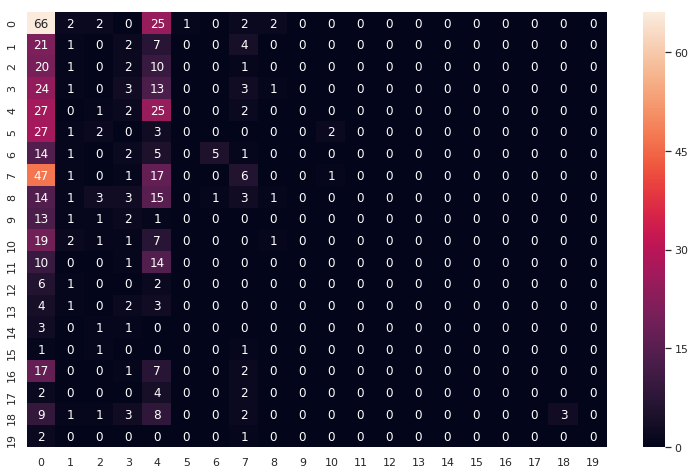

In [85]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, nb_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [92]:
metrics.f1_score(y_test, pred, average='weighted')

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.11645318517587866

# Random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_counts, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [87]:
classifier.predict(count_vect.transform([X_test_list[200]]))

array([0])

In [88]:
rf_predictions=[] 
# model accuracy for X_test   
#accuracy = svm_model_linear.score(count_vect.transform([X_test_list[i]]), y_test) 
for i in range(len(X_test_list)): 
    rf_predictions.append(int(str(classifier.predict(count_vect.transform([X_test_list[i]])))[1:-1]))
# creating a confusion matrix 
rf_predictions

[7,
 7,
 7,
 0,
 8,
 7,
 2,
 2,
 16,
 5,
 0,
 0,
 7,
 4,
 5,
 0,
 0,
 6,
 4,
 4,
 0,
 0,
 3,
 2,
 0,
 4,
 0,
 0,
 7,
 7,
 3,
 0,
 18,
 4,
 0,
 4,
 0,
 7,
 7,
 3,
 0,
 6,
 7,
 11,
 0,
 3,
 0,
 5,
 2,
 0,
 11,
 0,
 7,
 2,
 4,
 7,
 8,
 7,
 7,
 0,
 3,
 0,
 0,
 4,
 0,
 2,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 4,
 2,
 1,
 3,
 0,
 0,
 7,
 0,
 7,
 0,
 4,
 8,
 0,
 7,
 0,
 7,
 4,
 4,
 3,
 1,
 0,
 2,
 4,
 3,
 0,
 4,
 7,
 3,
 4,
 2,
 7,
 7,
 0,
 0,
 0,
 7,
 7,
 18,
 4,
 3,
 0,
 2,
 3,
 4,
 7,
 7,
 0,
 0,
 3,
 7,
 0,
 4,
 5,
 0,
 4,
 6,
 4,
 0,
 4,
 0,
 0,
 8,
 4,
 3,
 3,
 4,
 4,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 6,
 1,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 0,
 4,
 0,
 3,
 4,
 2,
 7,
 7,
 0,
 10,
 0,
 10,
 16,
 0,
 0,
 11,
 1,
 0,
 0,
 3,
 4,
 0,
 4,
 3,
 0,
 0,
 3,
 7,
 0,
 0,
 0,
 7,
 1,
 3,
 3,
 3,
 9,
 0,
 0,
 10,
 6,
 0,
 0,
 3,
 16,
 0,
 0,
 7,
 0,
 0,
 7,
 8,
 0,
 7,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 7,
 3,
 7,
 0,
 10,
 7,
 2,
 0,
 0,
 0,
 7,
 7,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 7,
 7,
 0,
 0,
 4,

In [89]:
predictions['RF predictions']=rf_predictions

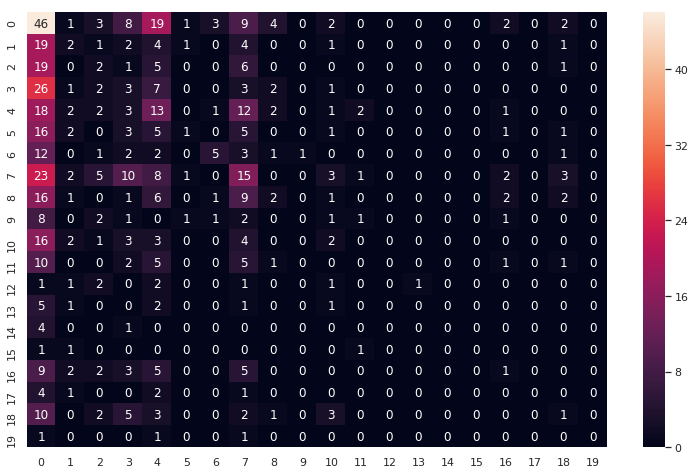

In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, rf_predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [95]:

from sklearn import metrics
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.17      0.46      0.25       100
           1       0.11      0.06      0.07        35
           2       0.08      0.06      0.07        34
           3       0.06      0.07      0.06        45
           4       0.14      0.23      0.17        57
           5       0.20      0.03      0.05        35
           6       0.45      0.18      0.26        28
           7       0.17      0.21      0.19        73
           8       0.15      0.05      0.07        41
           9       0.00      0.00      0.00        18
          10       0.11      0.06      0.08        31
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         3
          16       0.09      0.04      0.05        27
          17       0.00    

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
metrics.f1_score(y_test, rf_predictions, average='weighted')

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.12034627151370555

# kNN

In [113]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_tfidf, y_train)
    pred_i = knn.predict(count_vect.transform(X_test_list))
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

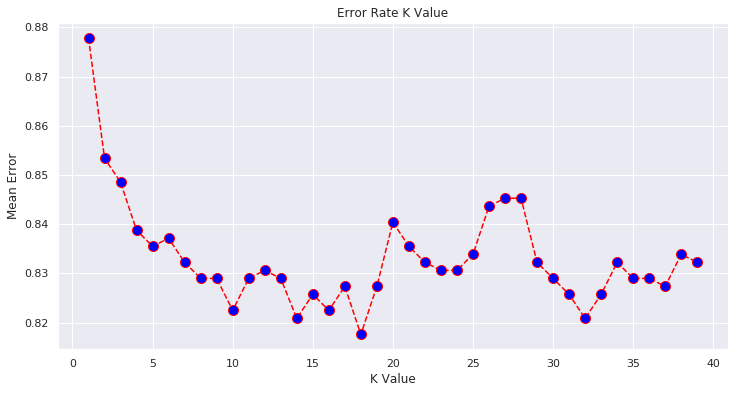

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [115]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=18)

# Train the model using the training sets
model.fit(X_train_tfidf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [116]:
knn_predictions=[] 
# model accuracy for X_test   
#accuracy = svm_model_linear.score(count_vect.transform([X_test_list[i]]), y_test) 
for i in range(len(X_test_list)): 
    knn_predictions.append(int(str(model.predict(count_vect.transform([X_test_list[i]])))[1:-1]))
# creating a confusion matrix 
knn_predictions

[0,
 0,
 0,
 1,
 3,
 0,
 18,
 2,
 0,
 0,
 7,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 7,
 1,
 0,
 4,
 0,
 7,
 0,
 0,
 0,
 4,
 3,
 9,
 1,
 10,
 1,
 0,
 10,
 0,
 0,
 4,
 0,
 0,
 7,
 7,
 7,
 5,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 10,
 7,
 4,
 0,
 7,
 0,
 1,
 0,
 4,
 4,
 7,
 0,
 3,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 7,
 0,
 4,
 0,
 0,
 0,
 3,
 0,
 8,
 3,
 0,
 0,
 4,
 18,
 0,
 7,
 0,
 0,
 0,
 1,
 4,
 2,
 0,
 4,
 7,
 7,
 5,
 0,
 7,
 0,
 7,
 4,
 0,
 0,
 10,
 0,
 0,
 5,
 7,
 2,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 4,
 4,
 3,
 0,
 0,
 0,
 7,
 4,
 0,
 0,
 4,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 3,
 3,
 0,
 6,
 4,
 4,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 4,
 7,
 18,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 4,
 3,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 1,
 4,
 0,
 4,
 1,
 2,
 2,
 0,
 4,
 7,
 1,
 4,
 0,
 3,
 0,
 3,
 1,
 0,
 6,
 0,
 4,
 18,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 10,
 0,
 7,
 1,
 0,
 0,
 18,
 4,
 3,
 4,
 4,
 0,
 4,
 0,
 7,
 0,
 18,
 0,
 1,
 2,
 1,
 0,
 3,
 0,
 0,
 4,
 7,
 4,
 18,
 0,
 0,
 6,
 4,
 2,
 0,
 5,
 0

In [117]:
predictions['kNN predictions']=knn_predictions

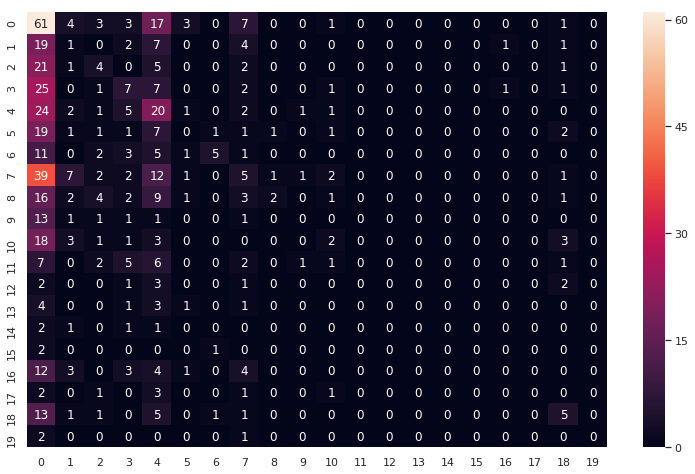

In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, knn_predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [102]:
metrics.f1_score(y_test, knn_predictions, average='weighted')

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.10880604245785473

In [101]:
from sklearn import metrics
print(metrics.classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.19      0.52      0.28       100
           1       0.10      0.20      0.13        35
           2       0.18      0.26      0.21        34
           3       0.11      0.18      0.13        45
           4       0.11      0.14      0.12        57
           5       0.00      0.00      0.00        35
           6       0.62      0.18      0.28        28
           7       0.12      0.04      0.06        73
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        31
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00        27
          17       0.00    

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
